## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(mouse_study["Mouse ID"].unique())
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study["Mouse ID"].value_counts()
duplicates.head()

g989    13
y865    10
j913    10
m546    10
l725    10
Name: Mouse ID, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mouse = mouse_study.set_index("Mouse ID")
mouse = bad_mouse.loc['g989',:]
mouse.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = bad_mouse.drop(index = 'g989')
new_study_data = new_data.reset_index()
new_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_total = len(new_study_data["Mouse ID"].unique())
new_total

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = new_study_data.groupby("Drug Regimen")
mean_tumor = drug_group["Tumor Volume (mm3)"].mean()
median_tumor = drug_group["Tumor Volume (mm3)"].median()
varience_tumor = drug_group["Tumor Volume (mm3)"].var()
sd_tumor = drug_group["Tumor Volume (mm3)"].std()
sem_tumor = drug_group["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_summary = pd.DataFrame({"Mean":mean_tumor,
                            "Median":median_tumor,
                            "Variance": varience_tumor,
                            "Stan Dev": sd_tumor,
                            "SEM":sem_tumor})
drug_summary

,Mean,Median,Variance,Stan Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mean_tumor = drug_group["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
mean_tumor

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

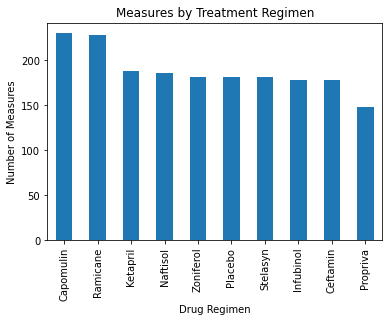

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = new_study_data['Drug Regimen'].value_counts().plot.bar()

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Measures")
bar_plot.set_title("Measures by Treatment Regimen")

plt.show()

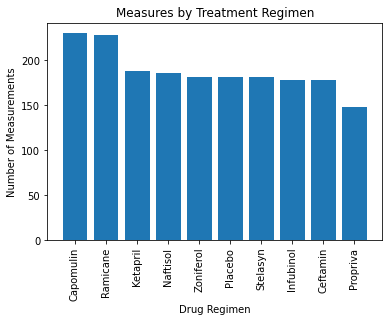

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
counts = new_study_data['Drug Regimen'].value_counts()
x_axis = np.arange(len(counts))

plt.bar(x_axis, counts)

plt.xticks(x_axis, counts.index.values)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title('Measures by Treatment Regimen')
plt.xticks(rotation=90)

plt.show()

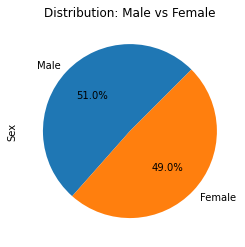

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = new_study_data['Sex'].value_counts()
pie_plot = gender.plot.pie(autopct="%1.1f%%",startangle=45, title='Distribution: Male vs Female')
pie_plot

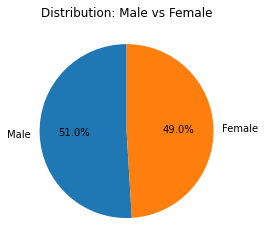

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart = new_study_data['Sex'].value_counts()

plt.pie(pie_chart, labels=pie_chart.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution: Male vs Female')

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = pd.DataFrame(new_study_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Greatest TP'})
max_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(new_study_data, max_time, on='Mouse ID')
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest TP
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drugs in drugs:
    mouse_drug = merged.loc[merged['Drug Regimen'] == drugs]
    
    # add subset 
    final_volume = mouse_drug.loc[mouse_drug['Timepoint'] == mouse_drug['Greatest TP']]
    values = final_volume['Tumor Volume (mm3)']
    drug_list.append(values)
    
    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = round(upper-lower,2)
    print(f'IQR for {drugs}: {iqr}')
    
    lower_bound = round(lower - (1.5*iqr),2)
    upper_bound = round(upper + (1.5*iqr),2)
    print(f'Lower Bound for {drugs}: {lower_bound}')
    print(f'Upper Bound for {drugs}: {upper_bound}')
    outliers_count = (values.loc[(final_volume['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drugs} outliers: {outliers_count}')

IQR for Capomulin: 7.78
Lower Bound for Capomulin: 20.71
Upper Bound for Capomulin: 51.83
Number of Capomulin outliers: 0
IQR for Ramicane: 9.1
Lower Bound for Ramicane: 17.91
Upper Bound for Ramicane: 54.31
Number of Ramicane outliers: 0
IQR for Infubinol: 11.48
Lower Bound for Infubinol: 36.83
Upper Bound for Infubinol: 82.75
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.58
Lower Bound for Ceftamin: 25.35
Upper Bound for Ceftamin: 87.67
Number of Ceftamin outliers: 0


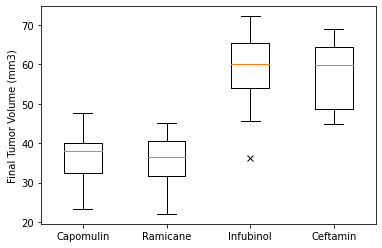

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='x')
plt.boxplot(drug_list, flierprops=flierprops)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

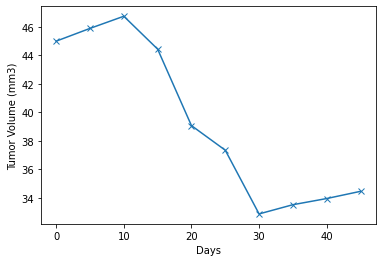

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# mouse treated with Capomulin = t565
treated_mouse= new_study_data.loc[new_study_data["Mouse ID"]=='t565']
plt.plot(treated_mouse['Timepoint'], treated_mouse['Tumor Volume (mm3)'], marker = 'x')

plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

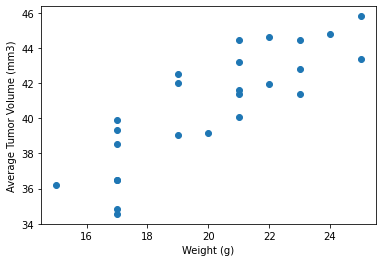

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_group = new_study_data.loc[new_study_data['Drug Regimen'] == 'Capomulin']
avg_vol = pd.DataFrame(capomulin_group.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'avg_tumor_vol'})

avg_vol= pd.merge(capomulin_group, avg_vol, on='Mouse ID')
final_avg_vol = avg_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

x = final_avg_vol['Weight (g)']
y = final_avg_vol['avg_tumor_vol']
plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

Correlation: 0.842


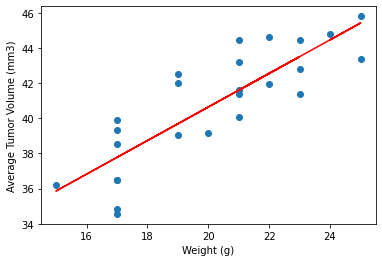

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_group = new_study_data.loc[new_study_data['Drug Regimen'] == 'Capomulin']
avg_vol = pd.DataFrame(capomulin_group.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'avg_tumor_vol'})

avg_vol= pd.merge(capomulin_group, avg_vol, on='Mouse ID')
final_avg_vol = avg_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

X = final_avg_vol['Weight (g)'].values.reshape(-1,1)
Y = final_avg_vol['avg_tumor_vol'].values.reshape(-1,1)

lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')

#Correlation
column_1=final_avg_vol['Weight (g)']
column_2=final_avg_vol['avg_tumor_vol']
correlation= round(column_1.corr(column_2),3)
print(f"Correlation:",correlation)